Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2099
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.1311  
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6567e-04 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2862e-04 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0533e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.3652e-04  
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 6.9508e-05  
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8591e-05 
Epoch 16/20

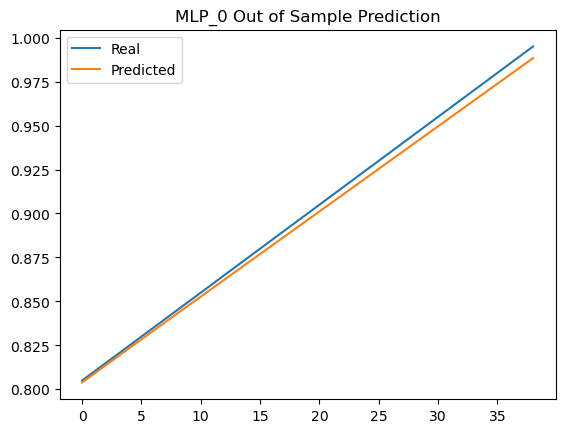

R2 =  0.9944339506827258
MAE =  0.003701681662828511
MSE =  1.6580190257150455e-05
MAPE =  0.004029696520784189
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


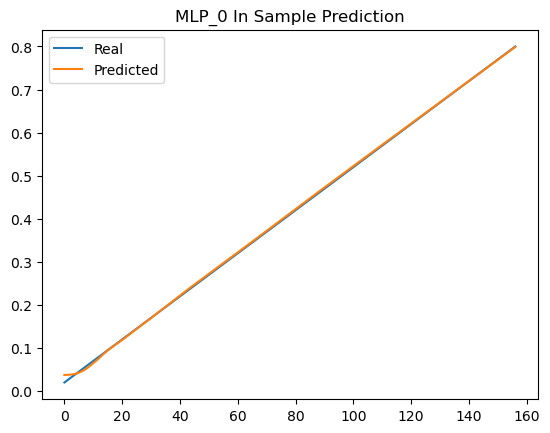

In [1]:
# Task 3.1.1.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Sequential

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#define an MLP model to be trained
def create_MLP(input_train, output_train, window_size, num_layers = 1, epochs = 1):

    num_neurons = 64
    activator_function = 'relu'

    # Create MLP model
    model = Sequential()
    model.add(Input((window_size,)))    # Input layer
    
    # Create hidden layers
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation=activator_function))    #   Hidden Layers

    model.add(Dense(1))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

# Task 3.1.1.1
# Creat an array of 200 steps from 0 to 1
num_points = 200
# Create the equal-difference series
series = np.linspace(0, 1, num_points, endpoint=False)

# Split data as required
train_series, test_series = split_data(series, 4, 1, 0.8)

# Create MLP
MLP_0 = create_MLP(train_series[0], train_series[1], 4, 10, 20)

# Predict out of sample values
MLP_0_Output_Predict = MLP_0.predict(test_series[0])

plt.figure()
plt.title("MLP_0 Out of Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(MLP_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_0_Output_Predict, test_series[1]))

# Predict in sample values
MLP_0_Output_Predict = MLP_0.predict(train_series[0])

plt.figure()
plt.title("MLP_0 In Sample Prediction")
plt.plot(train_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_0_InSample.png')
plt.show()




Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 0s/step - loss: 0.2275 
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1713 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0561 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0401  
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0148 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0076  
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.7749e-04 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 7.7050e-04
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6181e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 5.2080e-04
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5380e-04 
Epoch 16/20
5

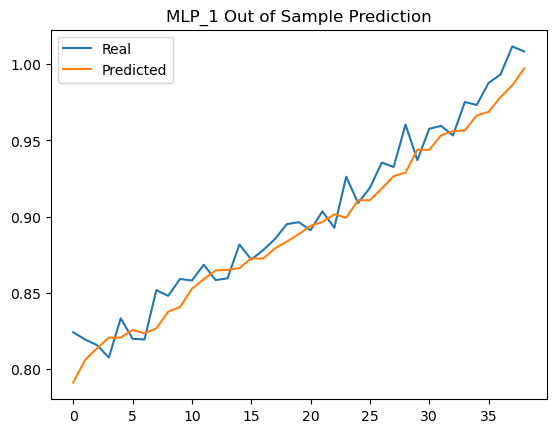

R2 =  0.9351200450018494
MAE =  0.011483232551380609
MSE =  0.00019754455646082633
MAPE =  0.012929786590707409
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


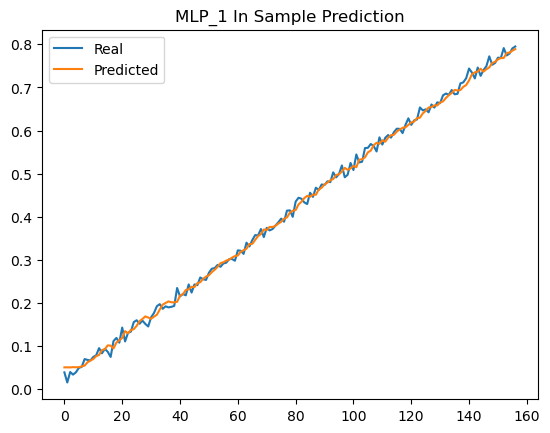

In [2]:
# Task 3.1.1.2
# Creat an array of 200 steps from 0 to 1 with noise
np.random.seed(0)  # for reproducibility
noise = np.random.normal(0, 1, num_points)  # random noise
series_noise = series + 0.01*noise

# Split data as required
train_series, test_series = split_data(series_noise, 4, 1, 0.8)

# Create MLP
MLP_1 = create_MLP(train_series[0], train_series[1], 4, 15, 20)

# Predict out of sample values
MLP_1_Output_Predict = MLP_1.predict(test_series[0])

plt.figure()
plt.title("MLP_1 Out of Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(MLP_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_1_Output_Predict, test_series[1]))

# Predict in sample values
MLP_1_Output_Predict = MLP_1.predict(train_series[0])

plt.figure()
plt.title("MLP_1 In Sample Prediction")
plt.plot(train_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.savefig('plots/MLP_1_InSample.png')
plt.show()

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0662
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


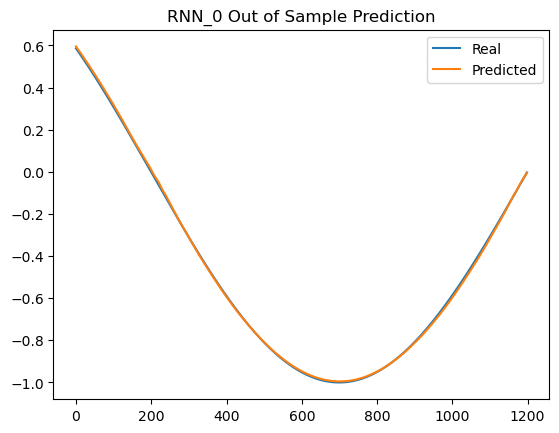

R2 =  0.9997305508691574
MAE =  0.006027959908361696
MSE =  5.6410440360341925e-05
MAPE =  0.049975227726122826
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


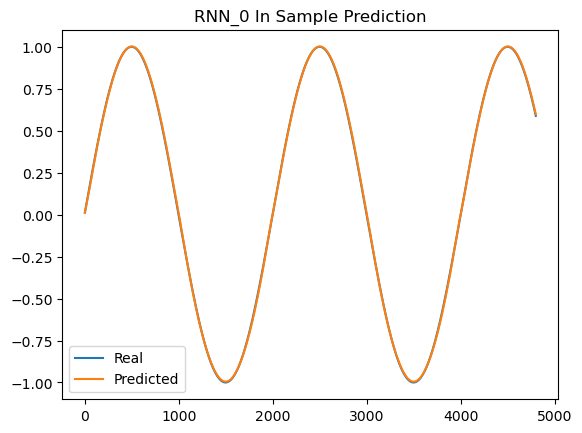

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2203
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


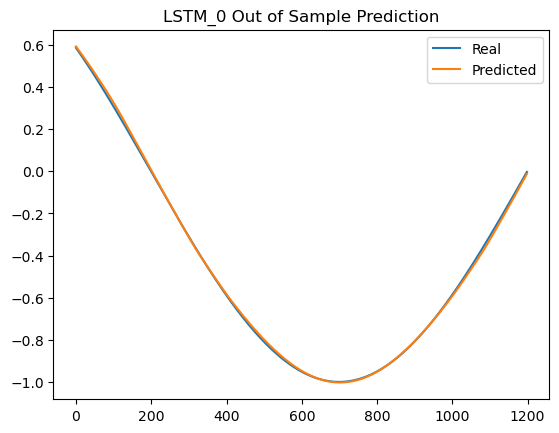

R2 =  0.9995410973423792
MAE =  0.00793565426963709
MSE =  9.566564337961742e-05
MAPE =  0.05686481297709262
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


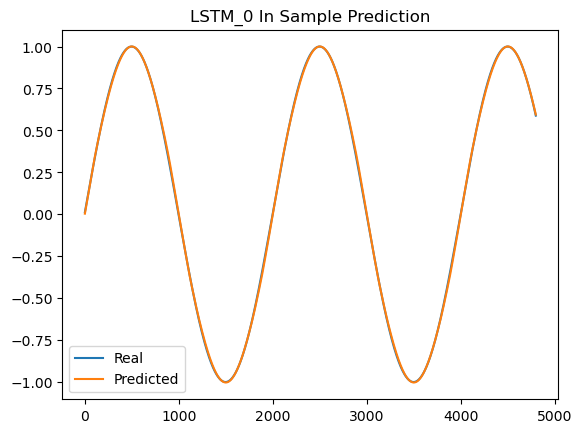

In [3]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM


def generate_sine_wave(freq, amplitude, duration, sampling_rate, noise_level):
    """
    Generate a sine wave.

    Parameters:
        freq (float): Frequency of the sine wave in Hz.
        amplitude (float): Amplitude of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        sampling_rate (int): Sampling rate (number of samples per second).

    Returns:
        numpy.ndarray: The generated sine wave.
    """
    num_samples = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_samples)
    noise = np.random.uniform(-noise_level, noise_level, num_samples)
    sine_wave = amplitude * np.sin(2 * np.pi * freq * time) + noise
    return [sine_wave,time]


#define an RNN model to be trained
def create_RNN(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create RNN model
    model = Sequential()
    model.add(SimpleRNN(num_neurons, activation="relu",input_shape=(window_size_in,1)))    # Input layer
    #model.add(Dense(32))
    #model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,activation="relu",input_shape=(window_size_in,1)))    # Input layer
    #model.add(Dense(32))
    #model.add(Dense(16))
    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model

# Task 3.1.1.2
# Sine wave Parameters
frequency = 1/20  # Hz
amplitude = 1.0
duration = 60.0  # seconds
sampling_rate = 100  # Hz

# Generate sine wave
[sine_wave, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, 0)

# Split data as required
train_series, test_series = split_data(sine_wave, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_0 = create_RNN(train_series[0], train_series[1], 4, 2)

# Predict out of sample values
RNN_0_Output_Predict = RNN_0.predict(test_series[0])

plt.figure()
plt.title("RNN_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(RNN_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_0_Output_Predict, test_series[1]))


# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_0_InSample.png')
plt.show()

# Create LSTM
LSTM_0 = create_LSTM(train_series[0], train_series[1], 4, 2, )

# Predict out of sample values
LSTM_0_Output_Predict = LSTM_0.predict(test_series[0])

plt.figure()
plt.title("LSTM_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_0_OutSample.png')
plt.show()

print('R2 = ', r2_score(LSTM_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_0_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_0_Output_Predict, test_series[1]))


# Predict in sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_0_InSample.png')
plt.show()


Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1819
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1027
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1040
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1018
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1024
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1021
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1023
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1017
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1018
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1015
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


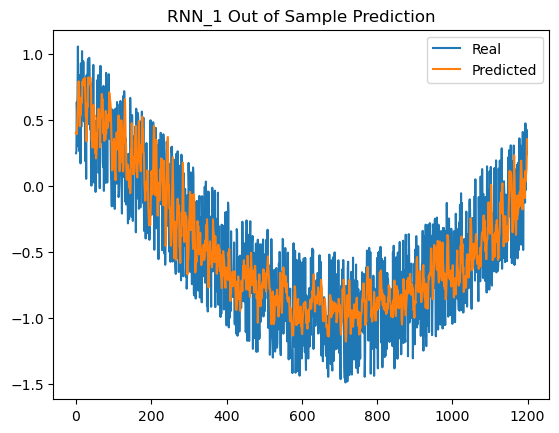

R2 =  0.5557478396162328
MAE =  0.2681387516945247
MSE =  0.10273760355028974
MAPE =  1.4944904676330837
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


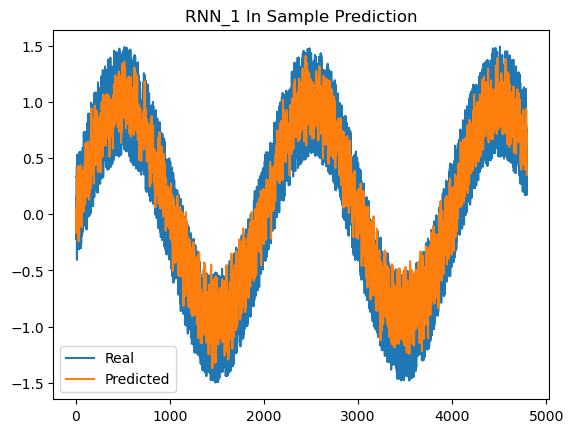

Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3586
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1022
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1020
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1016
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1005
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1008
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1009
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1013
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1009
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


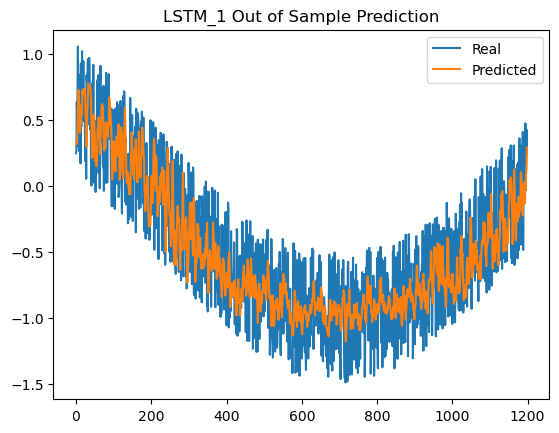

R2 =  0.5454975594558625
MAE =  0.26861161258200517
MSE =  0.10278920955439916
MAPE =  1.331033994664339
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


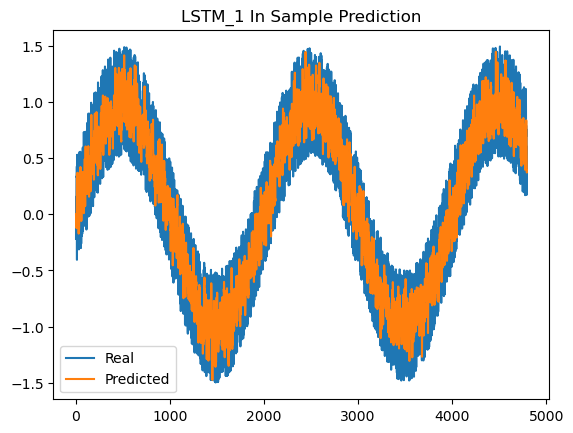

In [4]:

noise_level = 0.5   # noise

# Generate noisy sine wave
[sine_wave_noise, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, noise_level)

# Split data as required
train_series, test_series = split_data(sine_wave_noise, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_1 = create_RNN(train_series[0], train_series[1], 4, 2, 10)

# Predict output values
RNN_1_Output_Predict = RNN_1.predict(test_series[0])

plt.figure()
plt.title("RNN_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(RNN_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_1_Output_Predict, test_series[1]))

# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.title("RNN_1 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/RNN_1_InSample.png')
plt.show()

# Create LSTM
LSTM_1 = create_LSTM(train_series[0], train_series[1], 4, 2, 10)

# Predict out of sample values
LSTM_1_Output_Predict = LSTM_1.predict(test_series[0])

plt.figure()
plt.title("LSTM_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(LSTM_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_1_OutSample.png')
plt.show()

print('R2 = ', r2_score(LSTM_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_1_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_1_Output_Predict, test_series[1]))


# Predict In sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.title("LSTM_1 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.savefig('plots/LSTM_1_InSample.png')
plt.show()

In [5]:
from statsmodels.tsa.arima_process import ArmaProcess

# Task 3.1.2

# Pure white noise signal
length = 1000  # Length of the white noise series

# Generate white noise
white_noise = np.random.normal(0, 1, length)  # mean = 0, standard deviation = 1

# Random Walker seies
# Compute the random walk
random_walk = np.cumsum(white_noise)

#ARMA(2,2) model
# Define the parameters for the ARMA(2, 2) process
ar_params = np.array([1, -0.75, 0.25])  # AR coefficients (include 1 for the zero lag)
ma_params = np.array([1, 0.65, 0.35])   # MA coefficients (include 1 for the zero lag)

# Generate the ARMA(2, 2) process
arma_process = ArmaProcess(ar_params, ma_params)

# Generate the series
arma_series = arma_process.generate_sample(nsample=length)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0792
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9858
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9673 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0085
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0046 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8840
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9862
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9869
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9285 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9200
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9539 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8961
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9156
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9351 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0180

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0097
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0008 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9538 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9838 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8927 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8973 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9162 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8700 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9316
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9217 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9182 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9433 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8880
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9619 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8830 
Epoc

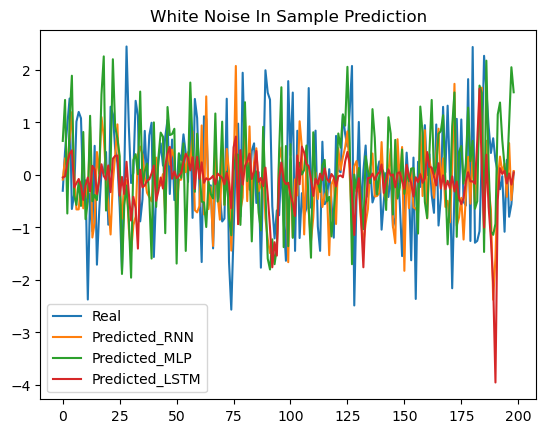

In [6]:
# Check different models for white noise

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(white_noise, input_window, 1, 0.8)

# Create MLP
MLP_2 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_2_Output_Predict = MLP_2.predict(test_series[0])

# Create RNN
RNN_2 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_2_Output_Predict = RNN_2.predict(test_series[0])

# Create LSTM
LSTM_2 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_2_Output_Predict = LSTM_2.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_2_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_2_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_2_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_2_Output_Predict, test_series[1]))


plt.figure()
plt.title("White Noise In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_2_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_2_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_2_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/WhiteNoise_InSample.png')
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 174.3248 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.9295 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.6004 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0587 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8656 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7245 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3086 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2396
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1814 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2977 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4322
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0722 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2957 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6629 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126.7760
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.9765 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6680 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4707 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3983 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2010 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3006 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2162 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2113 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2399 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1982 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2421 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2487 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1975 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1810 

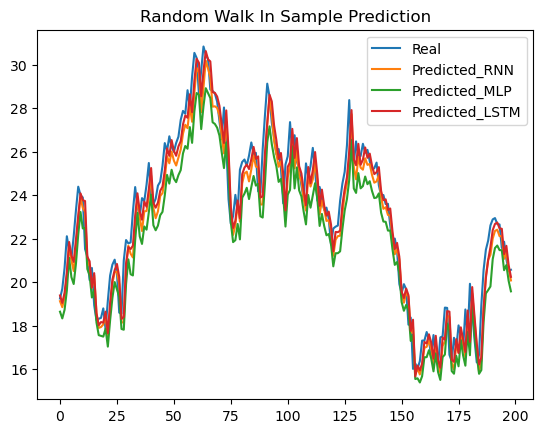

In [7]:
# Check different models for random_walk

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(random_walk, input_window, 1, 0.8)

# Create MLP
MLP_3 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_3_Output_Predict = MLP_3.predict(test_series[0])

# Create RNN
RNN_3 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_3_Output_Predict = RNN_3.predict(test_series[0])

# Create LSTM
LSTM_3 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_3_Output_Predict = LSTM_3.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_3_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_3_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_3_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_3_Output_Predict, test_series[1]))

plt.figure()
plt.title("Random Walk In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_3_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_3_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_3_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/RandomWalk_InSample.png')
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1402
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2874 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6770 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2215
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3273
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0930 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1553
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0941
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9032
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9549
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9839
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9417
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9776
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9775
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0181
E

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4292
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0279 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4161 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1309 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0904 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1645 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9893 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0606 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9562
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9883 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9751 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0617 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0027 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9651 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0594 
Epo

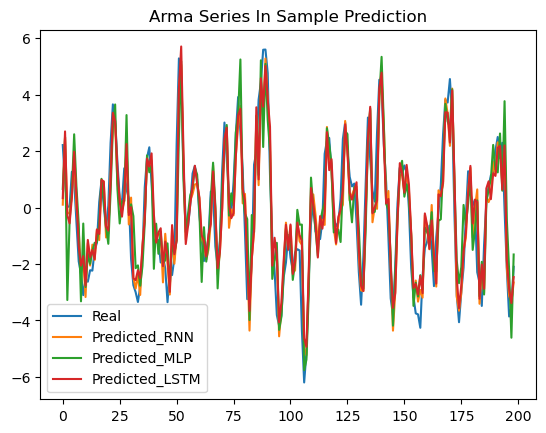

In [8]:
# Check different models for arma(2,2)

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(arma_series, input_window, 1, 0.8)

# Create MLP
MLP_4 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_4_Output_Predict = MLP_4.predict(test_series[0])

# Create RNN
RNN_4 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_4_Output_Predict = RNN_4.predict(test_series[0])

# Create LSTM
LSTM_4 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_4_Output_Predict = LSTM_4.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_4_Output_Predict, test_series[1]))


print("RNN")
print('R2 = ', r2_score(RNN_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_4_Output_Predict, test_series[1]))


print("LSTM")
print('R2 = ', r2_score(LSTM_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_4_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_4_Output_Predict, test_series[1]))


plt.figure()
plt.title("Arma Series In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_4_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_4_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_4_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/ArmaSeries_InSample.png')
plt.show()


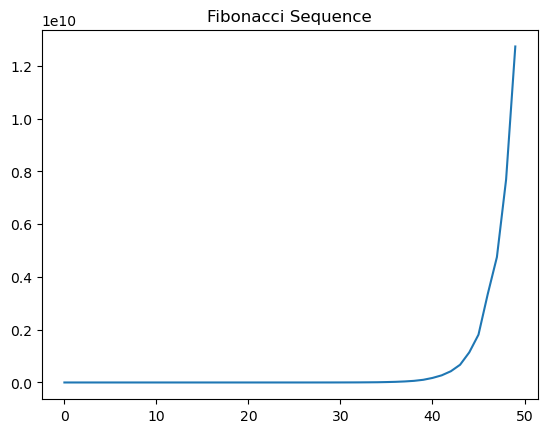

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 0s/step - loss: 349006626553856.0000
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 347966002954240.0000 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 532328413659136.0000 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 340924873834496.0000 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 382015564152832.0000  
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 332550627131392.0000
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 390143621988352.0000 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 239651340156928.0000 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 142971760541696.0000  
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 36258453651456.0000  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 15559732232192.0000  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 131529153970176.0000 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

NameError: name 'create_RNN' is not defined

In [2]:
#import tensorflow as tf

#3.1.3

# Generate sequence
num_points = 50
fib_sequence = [1, 1]   # Start with 1 to avoid negative values due to noise
while len(fib_sequence) < num_points:
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

fib_sequence = np.array(fib_sequence, dtype=np.float32)

# Add noise
noise_ratio = 0.05
fib_sequence_noise = np.array(fib_sequence, dtype=np.float32)
for i in range(len(fib_sequence)):
   fib_sequence_noise[i] = fib_sequence[i] +  np.random.normal(0, fib_sequence[i]*noise_ratio)

# Calculate noise amplitude
#noise_ratio = 0.05
#noise_amplitude = fib_sequence.std() * noise_ratio

#noise = np.random.normal(0, noise_amplitude, len(fib_sequence))
#offset = min(noise)
#fib_sequence_noise = fib_sequence + noise - offset

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence")
plt.plot(fib_sequence_noise)
plt.savefig('plots/FibSeq.png')
plt.show()

input_window = 2
epochs = 100
# Split data as required
train_series, test_series = split_data(fib_sequence_noise, input_window, 1, 0.8)

# Remove possible Nans
#train_series[0] = np.nan_to_num(train_series[0])
#train_series[1] = np.nan_to_num(train_series[1])
#test_series[0] = np.nan_to_num(test_series[0])
#test_series[1] = np.nan_to_num(test_series[1])

# Ensure series is compatible with tensor flow
#train_series[0] = tf.convert_to_tensor(train_series[0], dtype=tf.float32)
#train_series[1] = tf.convert_to_tensor(train_series[1], dtype=tf.float32)

#test_series[0] = tf.convert_to_tensor(test_series[0], dtype=tf.float32)
#test_series[1] = tf.convert_to_tensor(test_series[1], dtype=tf.float32)

# Create MLP
MLP_5 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_5_Output_Predict = MLP_5.predict(test_series[0], verbose=0)
#MLP_5_Output_Predict = np.nan_to_num(MLP_5_Output_Predict)

# Create RNN
RNN_5 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_5_Output_Predict = RNN_5.predict(test_series[0], verbose=0)
#RNN_5_Output_Predict = np.nan_to_num(RNN_5_Output_Predict)

# Create LSTM
LSTM_5 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_5_Output_Predict = LSTM_5.predict(test_series[0], verbose=0)
#LSTM_5_Output_Predict = np.nan_to_num(LSTM_5_Output_Predict)

plt.figure()
plt.title("Fibonacci RNN Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_5_Output_Predict, label='Predicted_RNN')
plt.legend()
plt.savefig('plots/Fib_RNN_OutSample.png')
plt.show()

plt.figure()
plt.title("Fibonacci LSTM Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(LSTM_5_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.savefig('plots/Fib_LSTM_OutSample.png')
plt.show()

plt.figure()
plt.title("Fibonacci MLP Out Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(MLP_5_Output_Predict, label='Predicted_MLP')
plt.legend()
plt.savefig('plots/Fib_MLP_OutSample.png')
plt.show()

print("MLP")
print('R2 = ', r2_score(MLP_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(MLP_5_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(RNN_5_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_5_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_5_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_5_Output_Predict, test_series[1]))
print('MAPE = ', mean_absolute_percentage_error(LSTM_5_Output_Predict, test_series[1]))


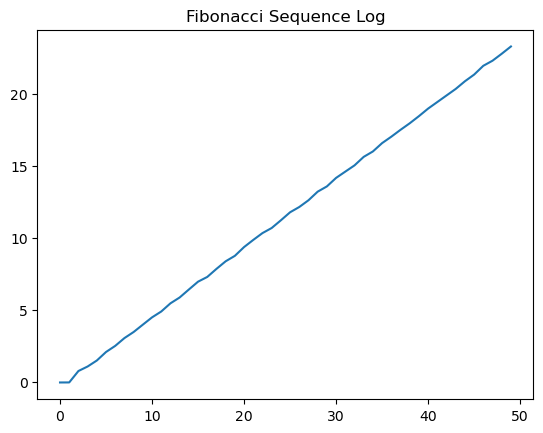

Original p_value =  0.9681398455200882


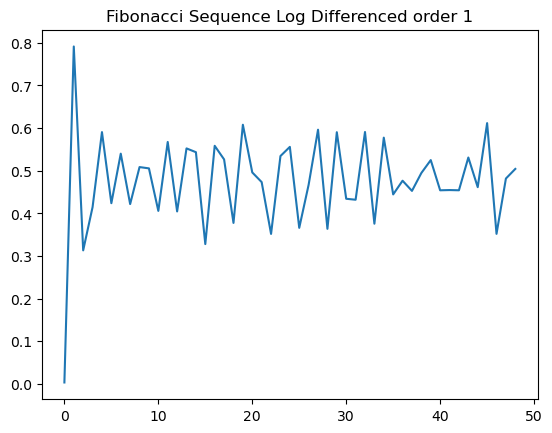

Diff 1 p_value =  6.576909536637762e-09


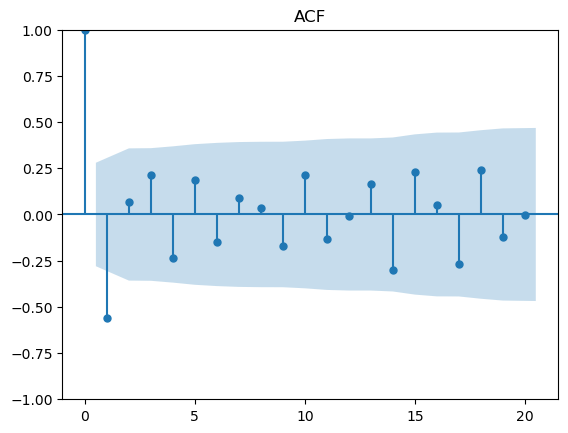

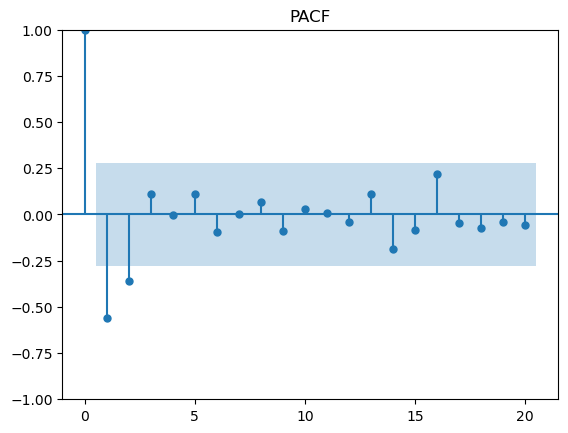

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


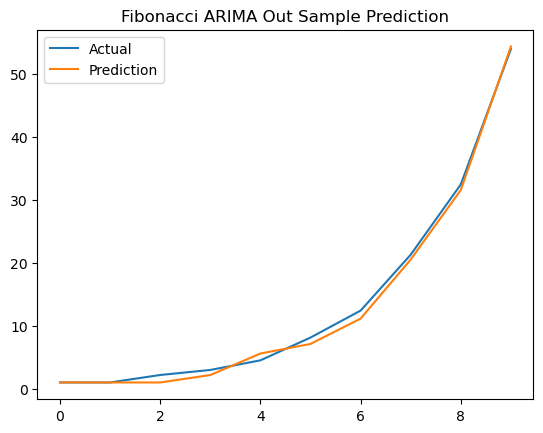

ARIMA
R2 =  0.9601473919305888
MAE =  0.16631671292762124
MSE =  0.08091595618600977
MAPE =  9114698226077.805
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  46.199
Date:                Wed, 29 May 2024   AIC                            -84.399
Time:                        15:22:08   BIC                            -76.831
Sample:                             0   HQIC                           -81.528
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0037      0.009      0.414      0.679      -0.014       0.021
ar.L2          0.996

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

# To determine ARIMA (p,d,q) properties:

# Data is non-stationary. Modify input data for better visualisation
fib_sequence_noise_log = np.log(fib_sequence_noise)

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence Log")
plt.plot(fib_sequence_noise_log)
plt.savefig('plots/FibSeq_Log.png')
plt.show()

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(fib_sequence_noise_log, autolag='AIC')
p_value = result_adf[1]
print("Original p_value = ", p_value)

# From log transformation of data, Linear trend detected. order-1 differencing applied to remove trend
fib_sequence_noise_log_diff = np.diff(fib_sequence_noise_log,1)

# Plot data for visual inspection
plt.figure()
plt.title("Fibonacci Sequence Log Differenced order 1")
plt.plot(fib_sequence_noise_log_diff)
plt.savefig('plots/FibSeq_Log_Diff1.png')
plt.show()

# ADF test to check if data is stationary
# p should be < 0.05 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff, autolag='AIC')
p_value = result_adf[1]
print("Diff 1 p_value = ", p_value)
'''
# Difference by order 2 now
fib_sequence_noise_log_diff2 = np.diff(fib_sequence_noise_log,2)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff2.png')
plt.title("Fibonacci Sequence Log Differenced order 2")
plt.plot(fib_sequence_noise_log_diff2)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print("Diff 2 p_value = ", p_value)

# Difference by order 3 now
fib_sequence_noise_log_diff3 = np.diff(fib_sequence_noise_log,3)

# Plot data for visual inspection
plt.figure()
plt.savefig('plots/FibSeq_Log_Diff3.png')
plt.title("Fibonacci Sequence Log Differenced order 3")
plt.plot(fib_sequence_noise_log_diff3)

# ADF test to check if data is stationary
# p should be < 0.5 is stationary
result_adf = adfuller(fib_sequence_noise_log_diff2)
p_value = result_adf[1]
print(p_value)
'''
# Data is stationary

# Plot ACF and PACF graphs to determine p,q values
plot_acf(fib_sequence_noise_log_diff, lags=20)
plt.title('ACF')
plt.savefig('plots/FibSeq_ACF.png')
plt.show()

plot_pacf(fib_sequence_noise_log_diff, lags=20)
plt.title('PACF')
plt.savefig('plots/FibSeq_PACF.png')
plt.show()

# p,d,q = 2,1,1

# Create ARIMA model
#arima_test_actual = fib_sequence_noise_log_diff[0:20]
arima_test_actual = fib_sequence_noise_log[0:10]
arima_model_unfit = ARIMA(fib_sequence_noise_log, order=(2,1,1))
arima_model = arima_model_unfit.fit()
arima_test_predict = arima_model.predict(start=0, end=len(arima_test_actual) - 1)

plt.figure()
plt.title("Fibonacci ARIMA Out Sample Prediction")
plt.plot(np.exp(arima_test_actual), label = "Actual")
plt.plot(np.exp(arima_test_predict), label = "Prediction")
plt.legend()
plt.savefig('plots/ARIMA_FibSeq.png')
plt.show()

# Note: Since a log transform was used, the data is using a log scale. The inbuilt functions below do not
# account for that. The accuracy metrics produced before are not correct.
print("ARIMA")
print('R2 = ', r2_score(arima_test_predict, arima_test_actual))
print('MAE = ', mean_absolute_error(arima_test_predict, arima_test_actual))
print('MSE = ', mean_squared_error(arima_test_predict, arima_test_actual))
print('MAPE = ', mean_absolute_percentage_error(arima_test_predict, arima_test_actual))

# Check AIC of model selected
# Should be as low as possible
print(arima_model.summary())

# Confirm with auto-arima
#arima_model = auto_arima(fib_sequence_noise_log_diff, d=1, seasonal=False, information_criterion='aic')
#print(arima_model.summary())
# Check if residual data is white noise
# Get difference of predicted vs actual data
residual_series = arima_model.resid

# perform adf test to check if data is stationary
result_adf = adfuller(residual_series, autolag='AIC')
print('\np-value: ',result_adf[1])
print("ADF Test: p value is < 0.05. Thus the data is stationary\n")

# perform Ljung-Box test on residuals with lag=1 to check if random
result_lb = sm.stats.acorr_ljungbox(residual_series, lags=[1], return_df=True)
print('p-value: ',result_lb)
print("Ljung-Box test: p value is > 0.05. Thus the data is random\n")

# Show data characteristics
print('Mean: ', residual_series.mean())
print('Variance: ', residual_series.var())
print('Standard deviation: ', residual_series.std())

